<a href="https://colab.research.google.com/github/ChinthakindhiNishitha/ML-LAB/blob/main/ML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from pathlib import Path

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/house_price_train.csv")

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.shape

(1460, 81)

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0 ]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
df.fillna(method="ffill", inplace=True)
print(df.isnull().sum())



Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


/tmp/ipython-input-2676094865.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [ ]:

df.dtypes


,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:

cat_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)
target_col = 'SalePrice'
print(df[target_col].dtype)

Categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
int64


In [ ]:
df['SalePrice_cat'] = pd.qcut(df[target_col], q=10, labels=False)
print(df['SalePrice_cat'].value_counts())


SalePrice_cat
3    150
7    149
1    149
6    146
0    146
9    145
2    144
8    144
5    144
4    143
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

X_cat = pd.DataFrame()
le = LabelEncoder()

for col in cat_features:
    X_cat[col] = le.fit_transform(df[col].astype(str))

y_cat = df['SalePrice_cat']


In [ ]:

from sklearn.feature_selection import chi2

chi_scores, p_values = chi2(X_cat, y_cat)

chi2_results = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2_score': chi_scores,
    'p_value': p_values
}).sort_values(by='p_value')

print(chi2_results)

          Feature  Chi2_score        p_value
27      HeatingQC  598.877059  3.647712e-123
33     GarageType  442.431203   1.189570e-89
8    Neighborhood  256.225421   4.833023e-50
34   GarageFinish  249.669757   1.171336e-48
21       BsmtQual  175.788572   3.834015e-33
12     HouseStyle  155.370221   6.793218e-29
30    KitchenQual  149.006657   1.416414e-27
3        LotShape  148.984941   1.431157e-27
18      ExterQual  113.405847   2.974141e-20
20     Foundation  109.084255   2.258480e-19
23   BsmtExposure   68.487474   3.011948e-11
11       BldgType   62.978199   3.562442e-10
24   BsmtFinType1   58.648647   2.439850e-09
16    Exterior2nd   53.223388   2.651223e-08
13      RoofStyle   47.593634   3.041731e-07
29     Electrical   43.321200   1.881815e-06
15    Exterior1st   42.084764   3.171344e-06
42  SaleCondition   28.412456   8.136430e-04
37     PavedDrive   23.456816   5.247939e-03
32    FireplaceQu   19.830566   1.898732e-02
7       LandSlope   19.192648   2.360377e-02
28     Cen

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('SalePrice')
numerical_features.remove('SalePrice_cat')
print("Numerical features:", numerical_features)

Numerical features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
from sklearn.feature_selection import f_classif
X = df[numerical_features]
y = df['SalePrice_cat']
f_scores, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values(by='p_value')
print(anova_results)


          Feature     F_score        p_value
4     OverallQual  305.227853   0.000000e+00
16      GrLivArea  148.347474  2.060816e-198
26     GarageCars  140.750462  1.253715e-190
27     GarageArea  118.199105  2.506044e-166
19       FullBath  114.447711  4.247896e-162
6       YearBuilt  104.606916  9.935935e-151
12    TotalBsmtSF   95.231056  1.659951e-139
13       1stFlrSF   87.483533  6.325321e-130
7    YearRemodAdd   85.346215  3.129556e-127
25    GarageYrBlt   60.983619   8.258560e-95
23   TotRmsAbvGrd   60.719202   1.937411e-94
24     Fireplaces   55.248505   1.108186e-86
8      MasVnrArea   42.731719   3.236329e-68
9      BsmtFinSF1   29.013315   9.287314e-47
20       HalfBath   23.952935   1.637002e-38
29    OpenPorchSF   23.348176   1.626035e-37
28     WoodDeckSF   21.104784   8.522749e-34
14       2ndFlrSF   19.572451   3.084142e-31
2     LotFrontage   16.573607   3.424997e-26
17   BsmtFullBath   12.719889   1.191495e-19
11      BsmtUnfSF   11.595977   9.780205e-18
3         

In [ ]:
df['LotFrontage'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-2890836401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-2890836401.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['LotFrontage'].fillna(method='ffill', inplace=True)


In [ ]:
print(df['MasVnrType'].isnull().sum())

0


In [ ]:
df = df.drop(columns=['MasVnrType'])

In [ ]:
df = df.drop(columns=['Alley'])

In [ ]:
df.fillna(method="ffill",inplace=True)
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
SalePrice_cat    0
Length: 80, dtype: int64


/tmp/ipython-input-2268526124.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
df = df.drop(columns=['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [ ]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']


In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

5

In [ ]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [ ]:
quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

20

In [ ]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [ ]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))


0


In [ ]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

10


In [ ]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

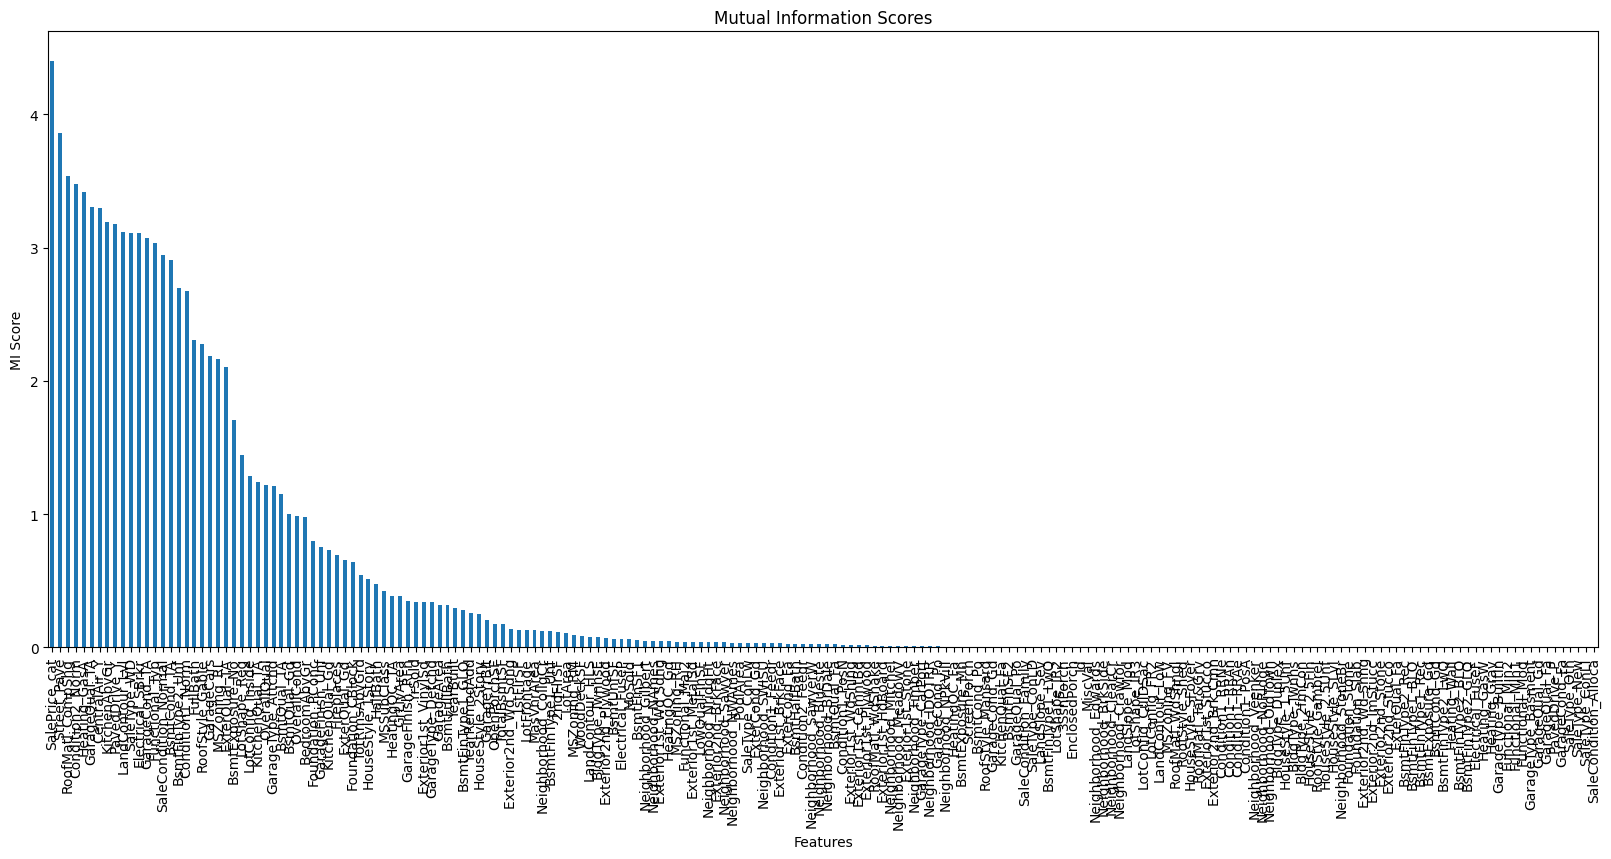

Top 10 Selected Features:
 ['SalePrice_cat', 'Street_Pave', 'Condition2_Norm', 'RoofMatl_CompShg', 'Heating_GasA', 'CentralAir_Y', 'GarageQual_TA', 'GarageCond_TA', 'PavedDrive_Y', 'SaleType_WD']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
sfs1=SFS(RandomForestRegressor(),k_features=5,forward=True,floating=False,verbose=2,scoring='r2',cv=3)
sfs1=sfs1.fit(np.array(x_train),y_train)
x_train.columns[list(sfs1.k_feature_idx_)]


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   26.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:  1.8min finished

[2025-08-13 09:25:23] Features: 1/5 -- score: 0.8902737362402627[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   23.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  1.7min finished

[2025-08-13 09:27:03] Features: 2/5 -- score: 0.9218624880860989[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   26.9s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed:  1.9min finished

[2025-08-13 09:28:54] Features: 3/5 -- score: 0.9411220690024082[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   27.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:  1.9min finished

[2025-08-13 09:30:50] Features: 4/5 

Index(['OverallQual', 'GrLivArea', 'FullBath', 'SalePrice_cat',
       'SaleType_New'],
      dtype='object')

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
sfs1=SFS(RandomForestRegressor(),k_features=5,forward=False,floating=False,verbose=2,scoring='r2',cv=3)
sfs1=sfs1.fit(np.array(x_train),y_train)
x_train.columns[list(sfs1.k_feature_idx_)]


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  4.6min
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed: 18.1min
[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed: 21.9min finished

[2025-08-20 07:29:50] Features: 195/5 -- score: 0.9442291177443729[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  4.4min
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed: 18.2min
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed: 21.9min finished

[2025-08-20 07:51:47] Features: 194/5 -- score: 0.9446455767103746[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  4.5min
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed: 17.9min
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed: 21.5min finished

[2025-08-20 08:13:14] Features: 193/5 -- score: 0.9445853281980376[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  4.3min


AttributeError: 'Parallel' object has no attribute '_pre_dispatch_amount'

In [35]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

efs = EFS(estimator=model,
          min_features=1,
          max_features=4,
          scoring='r2',
          cv=5)

efs = efs.fit(X_train, y_train)

print('Best R2 score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=False, inplace=True)

print(efs_results.head())



Features: 385/385

Best R2 score: 0.38
Best subset (indices): (2, 5, 8, 9)
Best subset (corresponding names): ('bmi', 's2', 's5', 's6')
      feature_idx                                          cv_scores  \
345  (2, 5, 8, 9)  [0.5398434979052924, 0.11657729430834629, 0.45...   
139     (2, 8, 9)  [0.5584771360414856, 0.08081416523573492, 0.41...   
349  (2, 7, 8, 9)  [0.5850705935289853, 0.04646998292164928, 0.41...   
339  (2, 4, 8, 9)  [0.526273378104205, 0.09946924577683958, 0.489...   
329  (2, 3, 8, 9)  [0.5090316440065242, 0.06677410931376138, 0.39...   

    avg_score      feature_names  ci_bound   std_dev   std_err  
345  0.378185  (bmi, s2, s5, s6)  0.216638  0.168551  0.084276  
139  0.375509      (bmi, s5, s6)  0.234757  0.182649  0.091325  
349  0.375486  (bmi, s4, s5, s6)  0.250887  0.195198  0.097599  
339  0.372337  (bmi, s1, s5, s6)  0.249236  0.193914  0.096957  
329  0.371834  (bmi, bp, s5, s6)  0.216425  0.168386  0.084193  


In [37]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

model = RandomForestRegressor()


rfecv = RFECV(estimator=model, step=1, cv=KFold(3), scoring='r2')
rfecv.fit(np.array(X_train), y_train)

selected_features = X_train.columns[rfecv.support_]
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", selected_features)

Optimal number of features: 8
Selected features: Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6'], dtype='object')
